# How to use DeepSparse YOLOv5 and YOLOv8 Pipelines With Supervision

[DeepSparse](https://neuralmagic.com/deepsparse/) offers accelerated inference on CPUs using breakthrough algorithms that reduce the computation needed for neural network execution and accelerate the resulting memory-bound computation.  In this notebook, we look at how to perform object detection on CPUs using DeepSparse and [Supervision](https://github.com/roboflow/supervision). Supervision offers a set of tools for computer vision such as counting the number of detections in a video or image.

## Install Supervision

In [ ]:
%%bash
git clone https://github.com/mwitiderrick/supervision.git
cd supervision
python3 -m pip install .

## Install DeepSparse

In [ ]:
pip install deepsparse[yolo]

In [ ]:
pip install deepsparse[yolov8]

In [ ]:
pip install -U numpy

## DeepSparse and Supervision With YOLOv5

In [ ]:
%%bash
wget -O basilica.jpg https://raw.githubusercontent.com/neuralmagic/deepsparse/main/src/deepsparse/yolo/sample_images/basilica.jpg

--2023-08-29 07:44:17--  https://raw.githubusercontent.com/neuralmagic/deepsparse/main/src/deepsparse/yolo/sample_images/basilica.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129644 (127K) [image/jpeg]
Saving to: ‘basilica.jpg’

     0K .......... .......... .......... .......... .......... 39% 4.15M 0s
    50K .......... .......... .......... .......... .......... 78% 5.18M 0s
   100K .......... .......... ......                          100% 47.1M=0.02s

2023-08-29 07:44:18 (5.69 MB/s) - ‘basilica.jpg’ saved [129644/129644]



In [ ]:
from deepsparse import Pipeline
import supervision as sv
model_stub = "zoo:cv/detection/yolov5-l6/pytorch/ultralytics/coco/base-none"
images = "basilica.jpg"
yolo_pipeline = Pipeline.create(task="yolo",model_path=model_stub)
pipeline_outputs = yolo_pipeline(images=images, iou_thres=0.6, conf_thres=0.001)
detections = sv.Detections.from_deepsparse(pipeline_outputs)
detections

Detections(xyxy=array([[468.05387878, 384.32783103, 532.93061829, 408.15395665],
       [729.86494446, 403.18360233, 768.49420166, 494.09217644],
       [310.14170837, 396.54544163, 363.49552917, 437.1106739 ],
       ...,
       [466.23413086, 398.93189359, 490.43005371, 435.64095378],
       [832.77612305, 409.38453197, 855.89447021, 437.52937412],
       [923.07614136, 431.24432898, 940.89395142, 458.56073332]]), mask=None, confidence=array([0.87485206, 0.85968804, 0.8464632 , 0.84451699, 0.83083272,
       0.81043613, 0.8083421 , 0.80633819, 0.80407506, 0.78860867,
       0.77390492, 0.74549389, 0.74141794, 0.73688561, 0.71745741,
       0.69569403, 0.6955021 , 0.68383008, 0.66650468, 0.65956306,
       0.6346761 , 0.6100648 , 0.60960996, 0.57413012, 0.5098272 ,
       0.49094963, 0.47780824, 0.44163108, 0.38759458, 0.35401759,
       0.34952745, 0.32400641, 0.28009567, 0.2737107 , 0.27109009,
       0.25969067, 0.25615713, 0.25478876, 0.25226218, 0.23734517,
       0.21364826, 0.1

## DeepSparse and Supervision With YOLOv8

In [ ]:
from deepsparse import Pipeline
import supervision as sv
model_stub = "zoo:cv/detection/yolov8-l/pytorch/ultralytics/coco/base-none"
images = "basilica.jpg"
yolo_pipeline = Pipeline.create(task="yolov8",model_path=model_stub)
pipeline_outputs = yolo_pipeline(images=images, iou_thres=0.6, conf_thres=0.001)
detections = sv.Detections.from_deepsparse(pipeline_outputs)
detections

downloading...:   0%|          | 0.00/167M [00:00<?, ?B/s]

Detections(xyxy=array([[     730.07,      407.39,      768.72,      493.68],
       [     466.35,      384.05,      531.87,      407.99],
       [       98.3,      379.53,      135.14,      462.86],
       ...,
       [      589.9,      374.38,      617.44,      385.23],
       [     439.93,      449.48,      471.13,      500.06],
       [     266.37,      402.16,       952.7,      540.72]]), mask=None, confidence=array([    0.78205,     0.76799,      0.7503,     0.74875,     0.74255,     0.70455,     0.62898,     0.61542,     0.60243,     0.58863,     0.55075,     0.54966,     0.51914,     0.49917,     0.49698,     0.48295,     0.47846,     0.47832,       0.478,     0.47739,     0.44757,      0.3588,     0.34598,     0.29849,
           0.29474,     0.29314,     0.23554,     0.23232,     0.18604,     0.18081,     0.17771,     0.17031,     0.16715,      0.1604,     0.15326,     0.15088,     0.14122,     0.13289,     0.13139,       0.129,     0.12331,     0.11615,      0.1138,     0.113

## Example 1: Car Counting in Traffic

### Annotate Single Frame

In [ ]:
pip install pytube

In [ ]:
from pytube import YouTube
youtube = YouTube('https://www.youtube.com/watch?v=-vLTFQv2_Vo')
video = youtube.streams.get_highest_resolution()
video.download()

'/content/Cars On Highway - Free Stock Creative Commons Video.mp4'

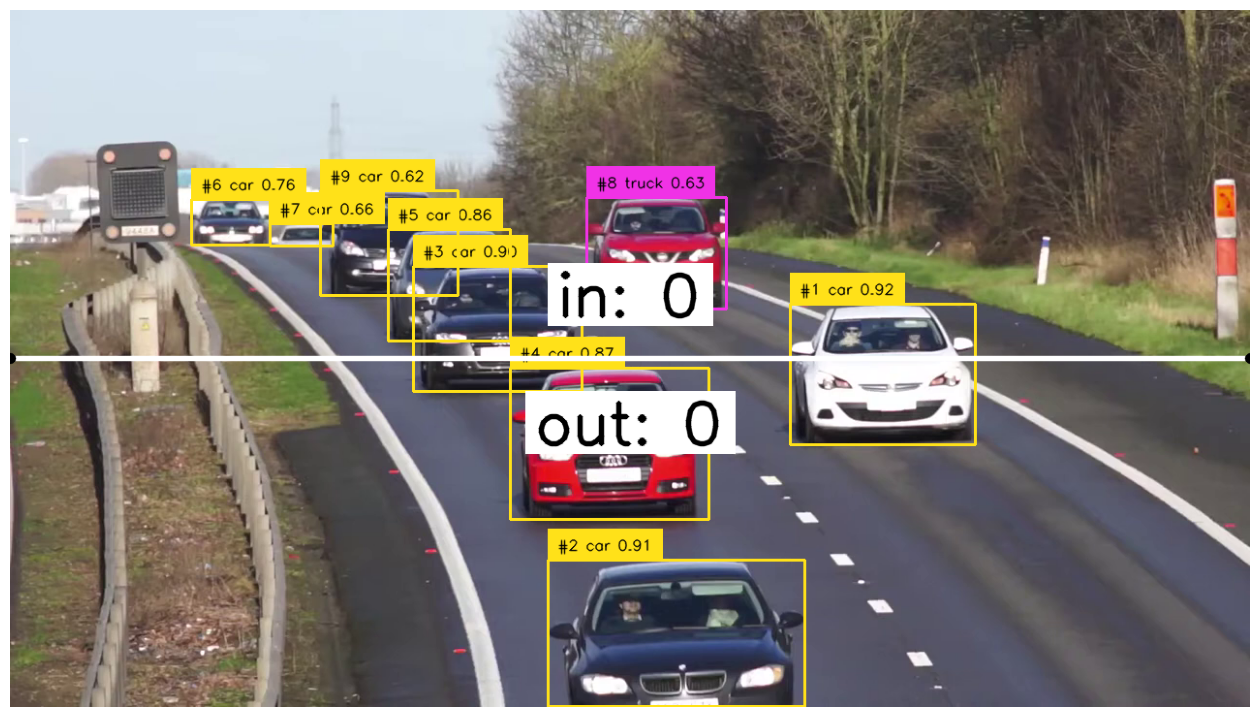

In [ ]:
import numpy as np
import supervision as sv
from deepsparse import Pipeline
classes = {2: "car", 3:"motorcycle", 5:"bus", 7:"truck"}

VIDEO_PATH = "Cars On Highway - Free Stock Creative Commons Video.mp4"

LINE_START = sv.Point(0, 360)
LINE_END = sv.Point(1280, 360)
# 1280 × 720

video_info = sv.VideoInfo.from_video_path(VIDEO_PATH)

# extract video frame
generator = sv.get_video_frames_generator(VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

byte_tracker = sv.ByteTrack()
line_counter = sv.LineZone(start=LINE_START,end=LINE_END)
line_annotator = sv.LineZoneAnnotator(thickness=4, text_thickness=4, text_scale=2)
box_annotator = sv.BoxAnnotator(thickness=2,text_thickness=1, text_scale=0.5)

# detect
model_stub = "zoo:cv/detection/yolov5-m/pytorch/ultralytics/coco/pruned70_quant-none"
yolo_pipeline = Pipeline.create(task="yolo",model_path=model_stub)
pipeline_results = yolo_pipeline(images=frame, iou_thres=0.6, conf_thres=0.001)
detections = sv.Detections.from_deepsparse(pipeline_results)
detections = detections[(
                        (detections.class_id == 2) |
                        (detections.class_id == 3) |
                        (detections.class_id == 5) |
                        (detections.class_id == 7)
                        )
                         & (detections.confidence > 0.5)
                           ]
detections = byte_tracker.update_with_detections(detections)
labels = [ f"#{tracker_id} {classes[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, tracker_id in detections ]

# annotate
frame = box_annotator.annotate(scene=frame,  detections=detections,labels=labels)
line_counter.trigger(detections=detections)
line_annotator.annotate(frame=frame, line_counter=line_counter)


%matplotlib inline
sv.plot_image(frame, (16, 16))

### Annotate Entire Video

In [ ]:
import supervision as sv
import numpy as np
from deepsparse import Pipeline
classes = {2: "car", 3:"motorcycle", 5:"bus", 7:"truck"}

TRAFFIC_VIDEO_PATH = "Cars On Highway - Free Stock Creative Commons Video.mp4"

colors = sv.ColorPalette.default()

LINE_START = sv.Point(0, 360)
LINE_END = sv.Point(1280, 360)

video_info = sv.VideoInfo.from_video_path(TRAFFIC_VIDEO_PATH)

byte_tracker = sv.ByteTrack()

line_counter = sv.LineZone(start=LINE_START,end=LINE_END)
line_annotator = sv.LineZoneAnnotator(thickness=4, text_thickness=4, text_scale=2)
box_annotator = sv.BoxAnnotator(thickness=2,text_thickness=1, text_scale=0.5)

def process_frame(frame: np.ndarray, i) -> np.ndarray:
    print(i)
    # detect
    model_stub = "zoo:cv/detection/yolov5-m/pytorch/ultralytics/coco/pruned70_quant-none"
    yolo_pipeline = Pipeline.create(task="yolo",model_path=model_stub)
    pipeline_results = yolo_pipeline(images=frame, iou_thres=0.6, conf_thres=0.001)

    detections = sv.Detections.from_deepsparse(pipeline_results)

    detections = detections[(
                        (detections.class_id == 2) |
                        (detections.class_id == 3) |
                        (detections.class_id == 5) |
                        (detections.class_id == 7)
                        )
                         & (detections.confidence > 0.5)
                           ]

    detections = byte_tracker.update_with_detections(detections)
    labels = [ f"#{tracker_id} {classes[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, tracker_id in detections ]

    # annotate
    frame = box_annotator.annotate(scene=frame,  detections=detections, labels=labels)
    line_counter.trigger(detections=detections)
    line_annotator.annotate(frame=frame, line_counter=line_counter)

    return frame

sv.process_video(source_path=TRAFFIC_VIDEO_PATH, target_path="final_count_cars.mp4", callback=process_frame)

from IPython import display
display.clear_output()

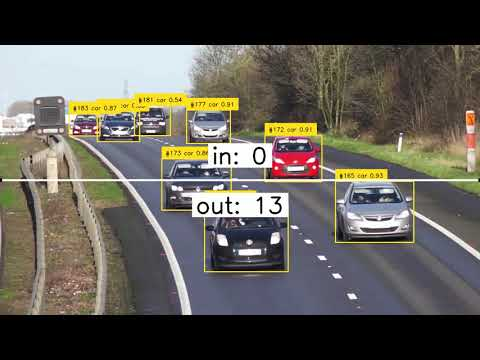

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('2zq9Nzn2GyU', width=1280, height=720)

## Example 2: People Counting in a Retail Store

### Annotate Single Frame

In [ ]:
from pytube import YouTube
youtube = YouTube('https://youtu.be/aEeYoGI-mUc')
video = youtube.streams.get_highest_resolution()
video.download()

'/content/People Walking in a Retail Store.mp4'

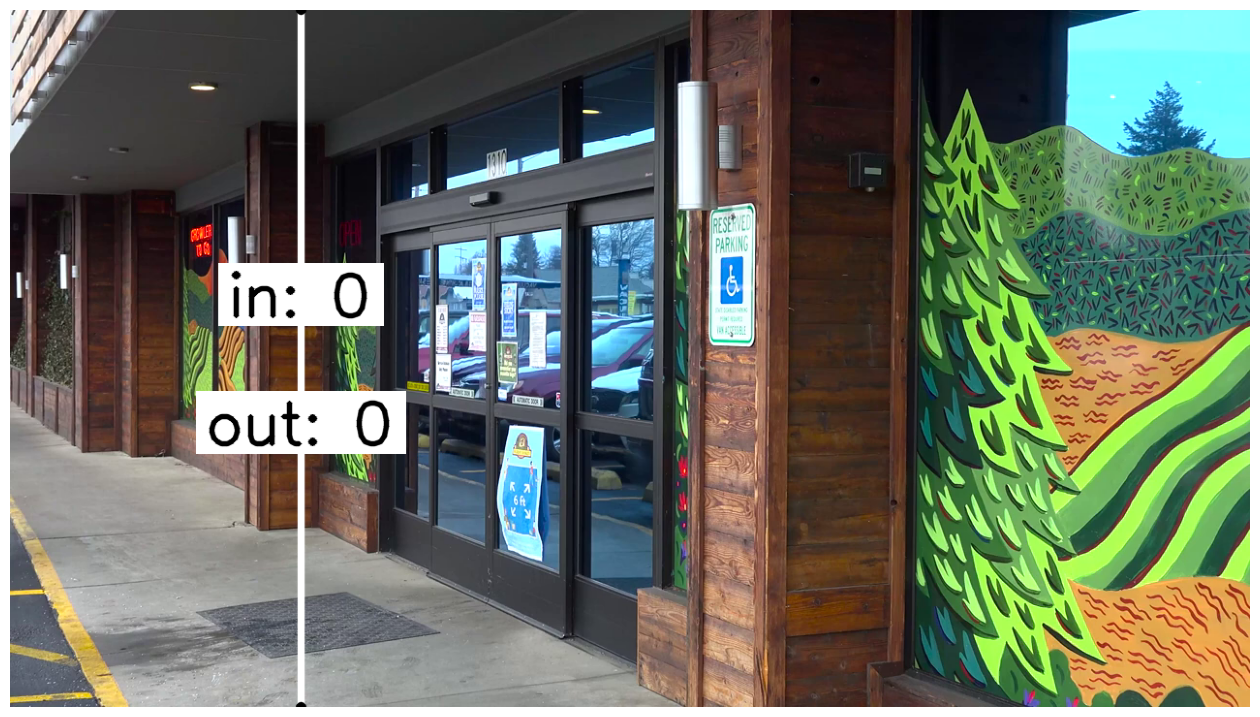

In [ ]:
import supervision as sv
import numpy as np
from deepsparse import Pipeline

classes = {0: "person"}

VIDEO_PATH = "People Walking in a Retail Store.mp4"

# extract video frame
generator = sv.get_video_frames_generator(VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

colors = sv.ColorPalette.default()

LINE_START = sv.Point(300, 0)
LINE_END = sv.Point(300, 720)

video_info = sv.VideoInfo.from_video_path(VIDEO_PATH)

byte_tracker = sv.ByteTrack()

line_counter = sv.LineZone(start=LINE_START,end=LINE_END)
line_annotator = sv.LineZoneAnnotator(thickness=6, text_thickness=4, text_scale=2)
box_annotator = sv.BoxAnnotator(thickness=2,text_thickness=1, text_scale=0.5)

# detect
model_stub = "zoo:cv/detection/yolov5-l6/pytorch/ultralytics/coco/base-none"
yolo_pipeline = Pipeline.create(task="yolo",model_path=model_stub)
pipeline_results = yolo_pipeline(images=frame, iou_thres=0.6, conf_thres=0.001)

detections = sv.Detections.from_deepsparse(pipeline_results)

detections = detections[(detections.class_id == 0) & (detections.confidence > 0.5)]

detections = byte_tracker.update_with_detections(detections)
labels = [ f"#{tracker_id} {classes[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, tracker_id in detections ]

# annotate
frame = box_annotator.annotate(scene=frame,  detections=detections, labels=labels)
line_counter.trigger(detections=detections)
line_annotator.annotate(frame=frame, line_counter=line_counter)

%matplotlib inline
sv.plot_image(frame, (16, 16))

### Annotate Entire Video

In [ ]:
import supervision as sv
import numpy as np
from deepsparse import Pipeline

classes = {0: "person"}

VIDEO_PATH = "People Walking in a Retail Store.mp4"

colors = sv.ColorPalette.default()

LINE_START = sv.Point(300, 0)
LINE_END = sv.Point(300, 720)

video_info = sv.VideoInfo.from_video_path(VIDEO_PATH)

byte_tracker = sv.ByteTrack()

line_counter = sv.LineZone(start=LINE_START,end=LINE_END)
line_annotator = sv.LineZoneAnnotator(thickness=6, text_thickness=4, text_scale=2)
box_annotator = sv.BoxAnnotator(thickness=2,text_thickness=1, text_scale=0.5)

def process_frame(frame: np.ndarray, i) -> np.ndarray:
    print(i)
    # detect
    model_stub = "zoo:cv/detection/yolov5-l6/pytorch/ultralytics/coco/base-none"
    yolo_pipeline = Pipeline.create(task="yolo",model_path=model_stub)
    pipeline_results = yolo_pipeline(images=frame, iou_thres=0.6, conf_thres=0.001)

    detections = sv.Detections.from_deepsparse(pipeline_results)

    detections = detections[(detections.class_id == 0) & (detections.confidence > 0.5)]

    detections = byte_tracker.update_with_detections(detections)
    labels = [ f"#{tracker_id} {classes[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, tracker_id in detections ]

    # annotate
    frame = box_annotator.annotate(scene=frame,  detections=detections, labels=labels)
    line_counter.trigger(detections=detections)
    line_annotator.annotate(frame=frame, line_counter=line_counter)

    return frame

sv.process_video(source_path=VIDEO_PATH, target_path="final_count_people.mp4", callback=process_frame)

from IPython import display
display.clear_output()

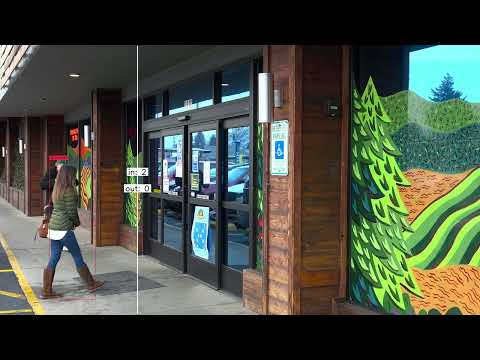

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('J-hSvfDLJRU', width=1280, height=720)

## Where to go From Here

For any questions join our [Slack community](https://join.slack.com/t/discuss-neuralmagic/shared_invite/zt-q1a1cnvo-YBoICSIw3L1dmQpjBeDurQ) or create an [issue on GitHub](https://github.com/neuralmagic/deepsparse).